---

# Brief Houses Prices
---

![cars](https://simplonline-v3-prod.s3.eu-west-3.amazonaws.com/media/image/png/ffd16b55-4723-4db0-b3b3-807362b61946.png)

---

## Contexte du projet
* Etape 1 : Recuperer la base de donnée train.csv
* Etape 2 : Comprendre la signification de chaque colonne : https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
* Etape 3 : Créer un notebook avec un titre et importer train.csv dans un dataframe
* Etape 4 : Réaliser une analyse exploratoire (moyenne, ecart-type, mediane, identifier les valeurs manquantes, correlations, data visualisation) ==> Privilegier la qualité de l'analyse plutôt que la quantité de cellule executé.
* Etape 5 : Faites une regression lineaire avec une feature. Choisir une feature qui n'a pas besoin d'être transformée).
* Etape 6 : Faites une regression lineaire avec Stats model et interpreter les résultats.
* Etape 7 : Faites une regression lineaire avec sklearn et interpreter les resultats : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression
* Etape 8 (Objectif) : Réaliser une prediction avec sklearn. Exemple : Prédire le prix d'un logement qui fait 58m2.
* Etape 9 Optionnel level 1 : Separer les données d'entrainement et données de test (test.csv) : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
* Etape 10 : Revenir à l'étape 7 et faire un .fit(X_train) avec les données d'entrainement et un .score(X_test) sur les données de test. (cf sklearn).
* Etape 11 : Comparer la difference de score entre l'entrainement avec de la fuite de donnée ( .fit(X_train, et un .score(y_train) ) et sans fuite de donnée (.fit(X_train) .score(y_test) interpreter.
* Etape 12 Optionnel Level 2 : Ajouter une feature supplémentaire (qui vous semble pertinante) à votre model pour essayer d'ameliorer les performances de votre model. Vous aurez probablement besoin d'utiliser cet outil de sklearn par exemple : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
* Etape 13 Optionnel Level 3: Structurer votre code avec par exemple :
    * Un fichier data.py > avec une methode .get_data()
    * Un fichier model.py > avec une methode .train()
    * Un fichier preprocessing.py > avec une methode .cleaning() et .preprocessing_'colum_name'()

## Réalisation du Brief Projet

### Import des models

In [1]:
from model import Model
from get_data import GetData

### Etape 1 et 3 : Récupération et création d'un modèle GetData à partir du fichier train.csv

In [2]:
data = GetData('train.csv')

### Etape 4 partie 1 : Analyse des données manquantes et totales du dataset

In [3]:
data.df_info()


        Longueur du dataset : 1460 enregistrements
        Nombre de colonnes : 81
        Nombre total de celulles non nulles : 111295
        Nombre total de cellules nulles : 6965
        soit 5.89 %
        


,colonne,type,Echantillon,% de valeurs nulles
Id,Id,int64,"[1, 2, 3, 4, 5]",0.00
MSSubClass,MSSubClass,int64,"[60, 20, 60, 70, 60]",0.00
MSZoning,MSZoning,object,"['RL', 'RL', 'RL', 'RL', 'RL']",0.00
LotFrontage,LotFrontage,float64,"[65.0, 80.0, 68.0, 60.0, 84.0]",17.74
LotArea,LotArea,int64,"[8450, 9600, 11250, 9550, 14260]",0.00
...,...,...,...,...
MoSold,MoSold,int64,"[2, 5, 9, 2, 12]",0.00
YrSold,YrSold,int64,"[2008, 2007, 2008, 2006, 2008]",0.00
SaleType,SaleType,object,"['WD', 'WD', 'WD', 'WD', 'WD']",0.00
SaleCondition,SaleCondition,object,"['Normal', 'Normal', 'Normal', 'Abnorml', 'Nor...",0.00


### Etape 4 partie 2 : Visualisation et analyse de la target du dataset

Analyse de la feature SalePrice


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

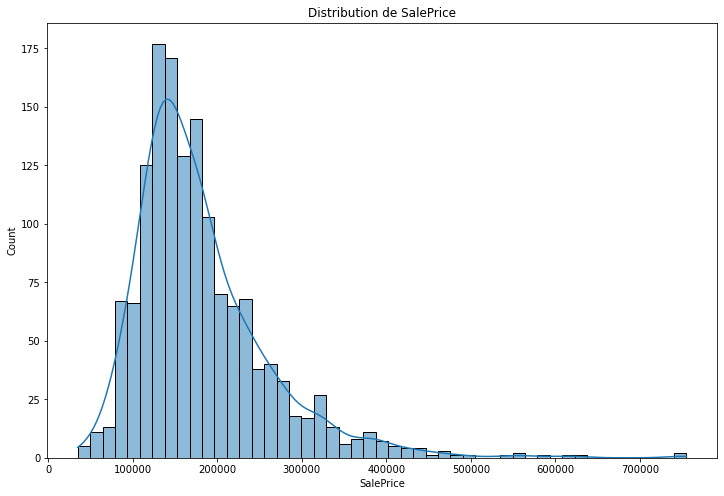

In [4]:
data.f_look('SalePrice')

> La variable a une moyenne de 180921 avec une médiane de 163000, et un écart-type de 79442.5
> On peut en dire que la médiane et la moyenne sont différentes, et donc que SalePrice n'est pas exactement distribuée selon la loi normale car elle présente de nombreuses valeurs extrêmes et par conséquent un skewness sur la droite.
> On peut aussi dire que plus de 50% (médiane) des biens vendus sont situés sous la moyenne.

### Etape 4 partie 3 : Visualisation de la corrélation entre la target et les différentes features du dataset

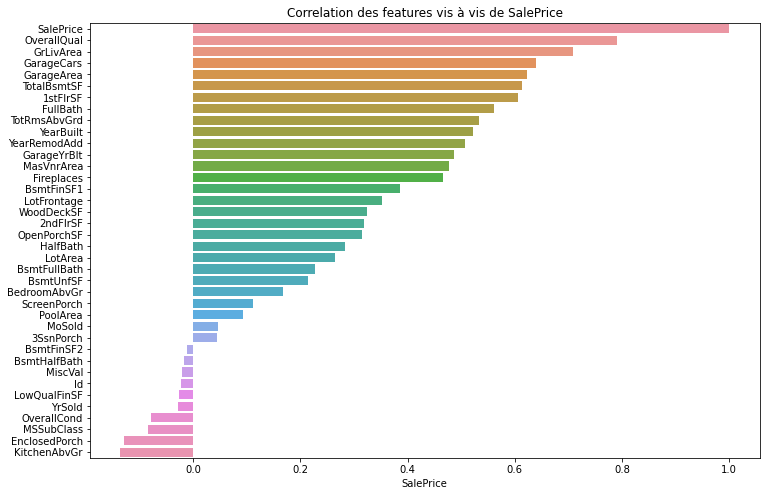

In [5]:
data.df_corr('SalePrice')

### Etape 5 partie 1 : Visualisation de la corrélation avec la feature et une feature spécifique

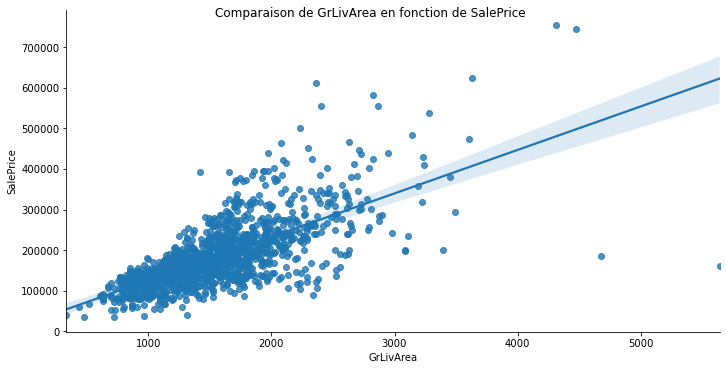

In [6]:
data.kompare('GrLivArea','SalePrice')

### Etape 5 partie 2 : Analyse de la feature sélectionnée pour la régression linéaire

Analyse de la feature GrLivArea


count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

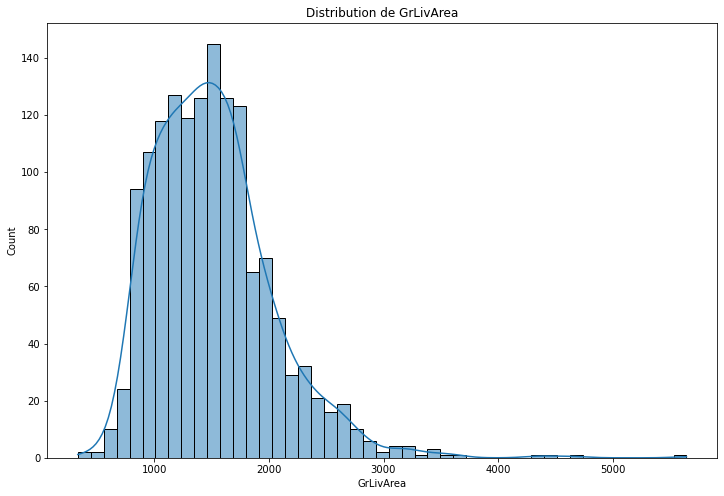

In [7]:
data.f_look('GrLivArea')

### Etape 6 partie 1 : Création d'un model pour réaliser la régression linéaire de SalePrice avec GrLivArea

In [8]:
model = Model(data.df,'SalePrice',['GrLivArea'])

### Etape 6 partie 2 : Réalisation de la régression linéaire via StatsModel

In [9]:
model.sm_regression()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Thu, 20 May 2021   Prob (F-statistic):          4.52e-223
Time:                        21:36:08   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.857e+04   4480.755      4.144      0.000    9779.612    2.74e+04
GrLivArea    107.1304      2.794     38.348      0.000     101.650     112.610
==============================================================================
Omnibus:                      261.166   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3432.287
Skew:                           0.410   Prob(JB):                         0.00
Kurtosis:                      10.467   Cond. No.                     4.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Etape 6 partie 3 : Interprétation de la régression linéaire

> On a un R carré de 0,5, ce qui signifie que nos données d'observations ne vont correspondre qu'à 50% des données attendues avec une fonction f(P-value) très proche de 0. donc l'évaluation de la performance du modele est fiable.

> La feature a un coefficient de 107 avec une P.value très faible. Donc la valaeur de ce coefficient est fiable.

### Etape 7 : Réalisation de la régression linéaire via SKLearn et interprétation des résultats avec StatsModel

In [10]:
model.sk_regression(model.df)

La constante est égale à : 18569.02585648728
Les coefficients directeurs sont respectivement de : [107.13035897]
le R² est de : 0.5021486502718042


> Le modèle nous renvoie la même chose que stats model

### Etape 8 : Prediction d'un logement de 1710 pieds carré soit 159 m carré

In [11]:
a = data.df['SalePrice'][data.df['GrLivArea'] == 1710].iloc[0]
b = round(model.sk_predict([[1710]])[0],2)

print(f"""
Valeur attendue = {a} feet2
Prédiction du modèle : {b} feet2
soit un écart de  : {round(abs(b-a)/a*100,2)} % d'écart
""")


Valeur attendue = 208500 feet2
Prédiction du modèle : 201761.94 feet2
soit un écart de  : 3.23 % d'écart



### Etape 9 partie 1 : Séparation du dataframe en une partie d'entrainement et de test

In [12]:
model.cut_df()

,SalePrice,GrLivArea
0,208500,1710


,SalePrice,GrLivArea
0,120500,864


### Etape 9 partie 2 : Visualisation de la partie d'entrainement

In [13]:
model.train

,SalePrice,GrLivArea
0,120500,864
1,112500,928
2,350000,2113
3,90000,1040
4,112500,882
...,...,...
1163,61000,904
1164,242000,2069
1165,133000,1573
1166,123000,872


### Etape 10 partie 1 : Réalisation de la régression linéaire univariée

In [14]:
model.sk_regression(model.train)

La constante est égale à : 22832.45457470871
Les coefficients directeurs sont respectivement de : [104.83254577]
le R² est de : 0.4727628287571557


### Etape 10 partie 2 : Analyse des résultats

In [15]:
model.sk_predict_test(model.test)

R² = 0.61


,Valeur Attendu,Prédiction
1168,100000,124310.358882
1169,106500,122528.205604
1170,208300,150518.495325
1171,275000,195386.824916
1172,156000,130390.646537
...,...,...
1455,130000,201991.275299
1456,207500,203983.093669
1457,143000,111730.453390
1458,266500,268140.611682


### Etape 12 partie 1 : Création d'un modèle avec la target et deux features

In [16]:
model2 = Model(data.df,'SalePrice',['GrLivArea','OverallQual'])

### Etape 12 partie 2 : Séparation du dataframe en entrainement et en test

In [17]:
model2.cut_df()

,SalePrice,GrLivArea,OverallQual
0,208500,1710,7


,SalePrice,GrLivArea,OverallQual
0,163900,1482,7


### Etape 12 partie 3 : Réalisation de la régression linéaire multivariée

In [18]:
model2.sk_regression(model2.train)

La constante est égale à : -105781.16531994488
Les coefficients directeurs sont respectivement de : [   59.06591817 32425.16877133]
le R² est de : 0.7244438088265763


### Etape 12 partie 4 : Analyse des résultats

In [19]:
model2.sk_predict_test(model2.test)

R² = 0.67


,Valeur Attendu,Prédiction
1168,200000,244642.785052
1169,111250,74952.463063
1170,108959,98224.434821
1171,139400,186640.053410
1172,173500,175951.142525
...,...,...
1455,158000,174120.099062
1456,132500,126633.121157
1457,148000,124565.814021
1458,151400,237675.027011
